In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [63]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [64]:
data = pd.read_csv(r"Country-data.csv")

##### PROBLEM STATEMENT

**Objective**:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

**About organization**:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

**Problem Statement**:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


![image.png](attachment:863b4cb5-7469-4480-a847-338483b43839.png)

In [65]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [66]:
# Lets use country name as index:
data.set_index('country', inplace = True)

In [67]:
data.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

In [68]:
# Shape of data
data.shape

(167, 9)

In [69]:
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### Data Exploration

In [70]:
# Univariate analysis

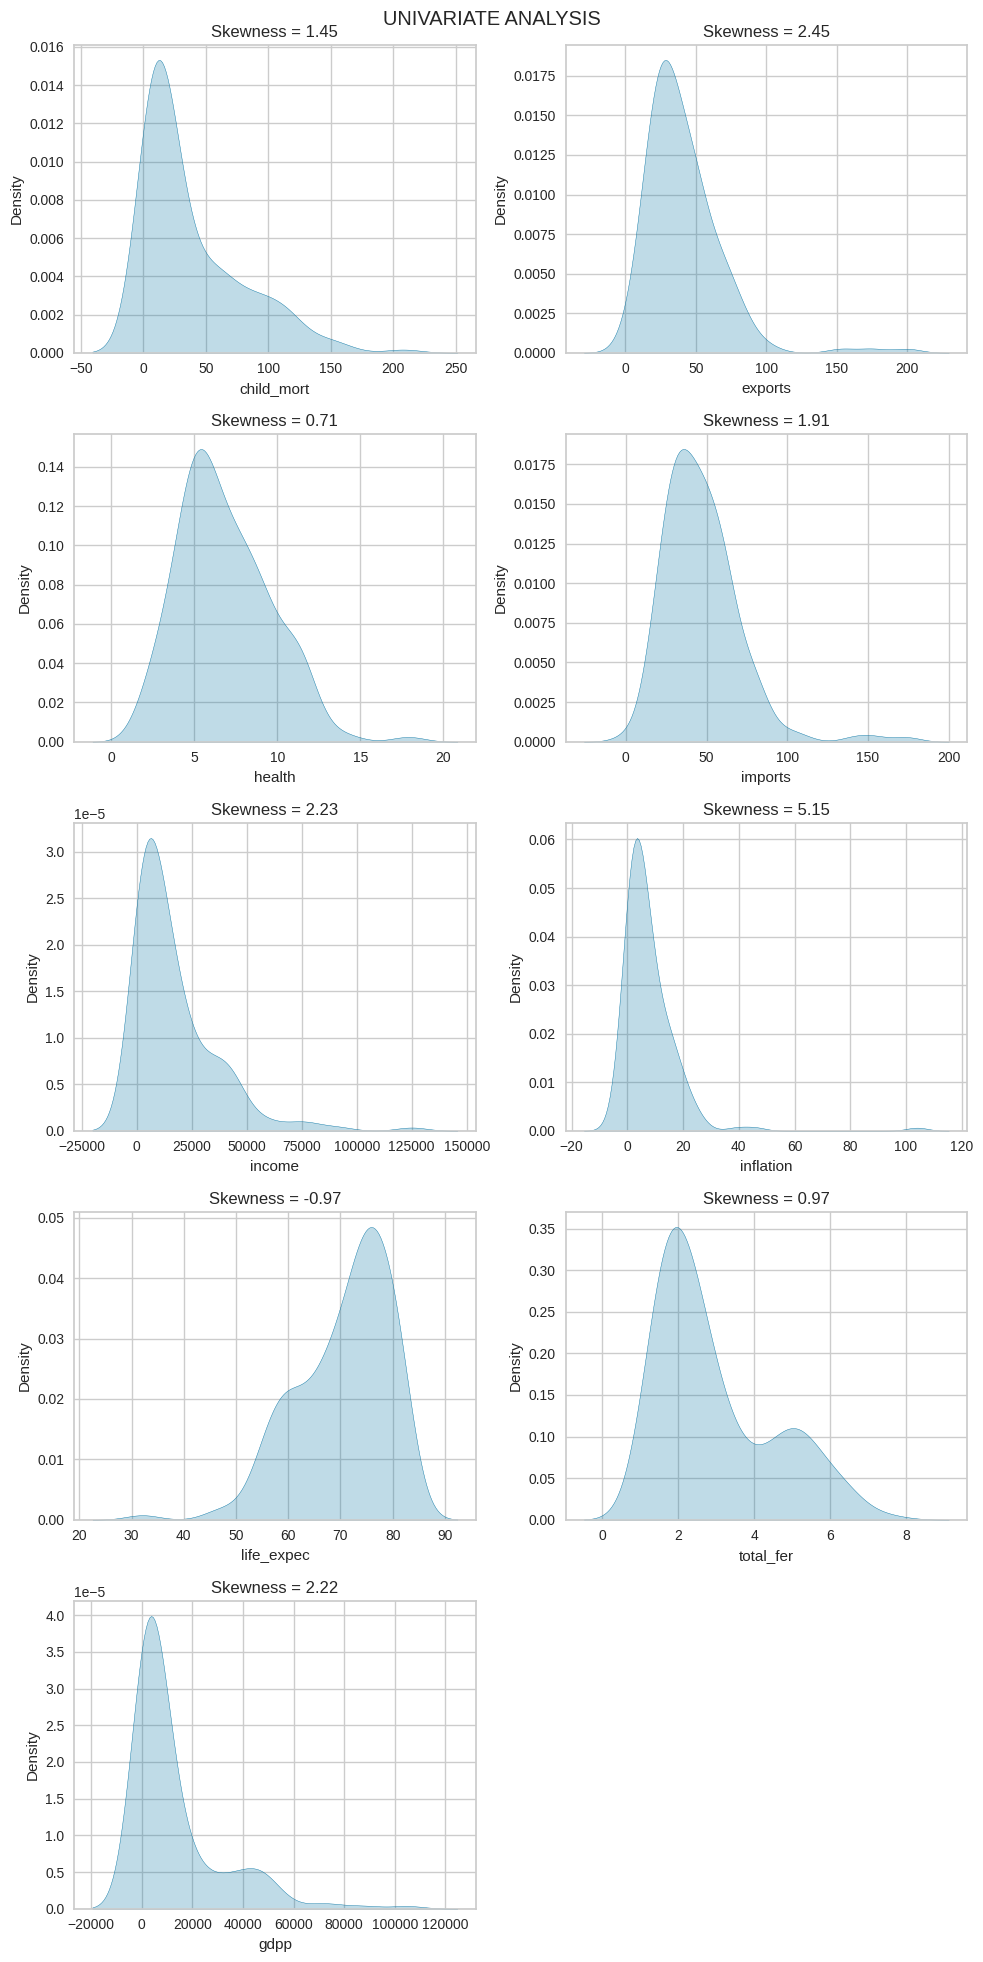

In [71]:
t = 1
plt.figure(figsize=(10,20))
plt.suptitle('UNIVARIATE ANALYSIS')
for i in data.columns:
    plt.subplot(5,2,t)
    sns.kdeplot(data=data, x=i, fill=True)
    plt.title(f'Skewness = {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

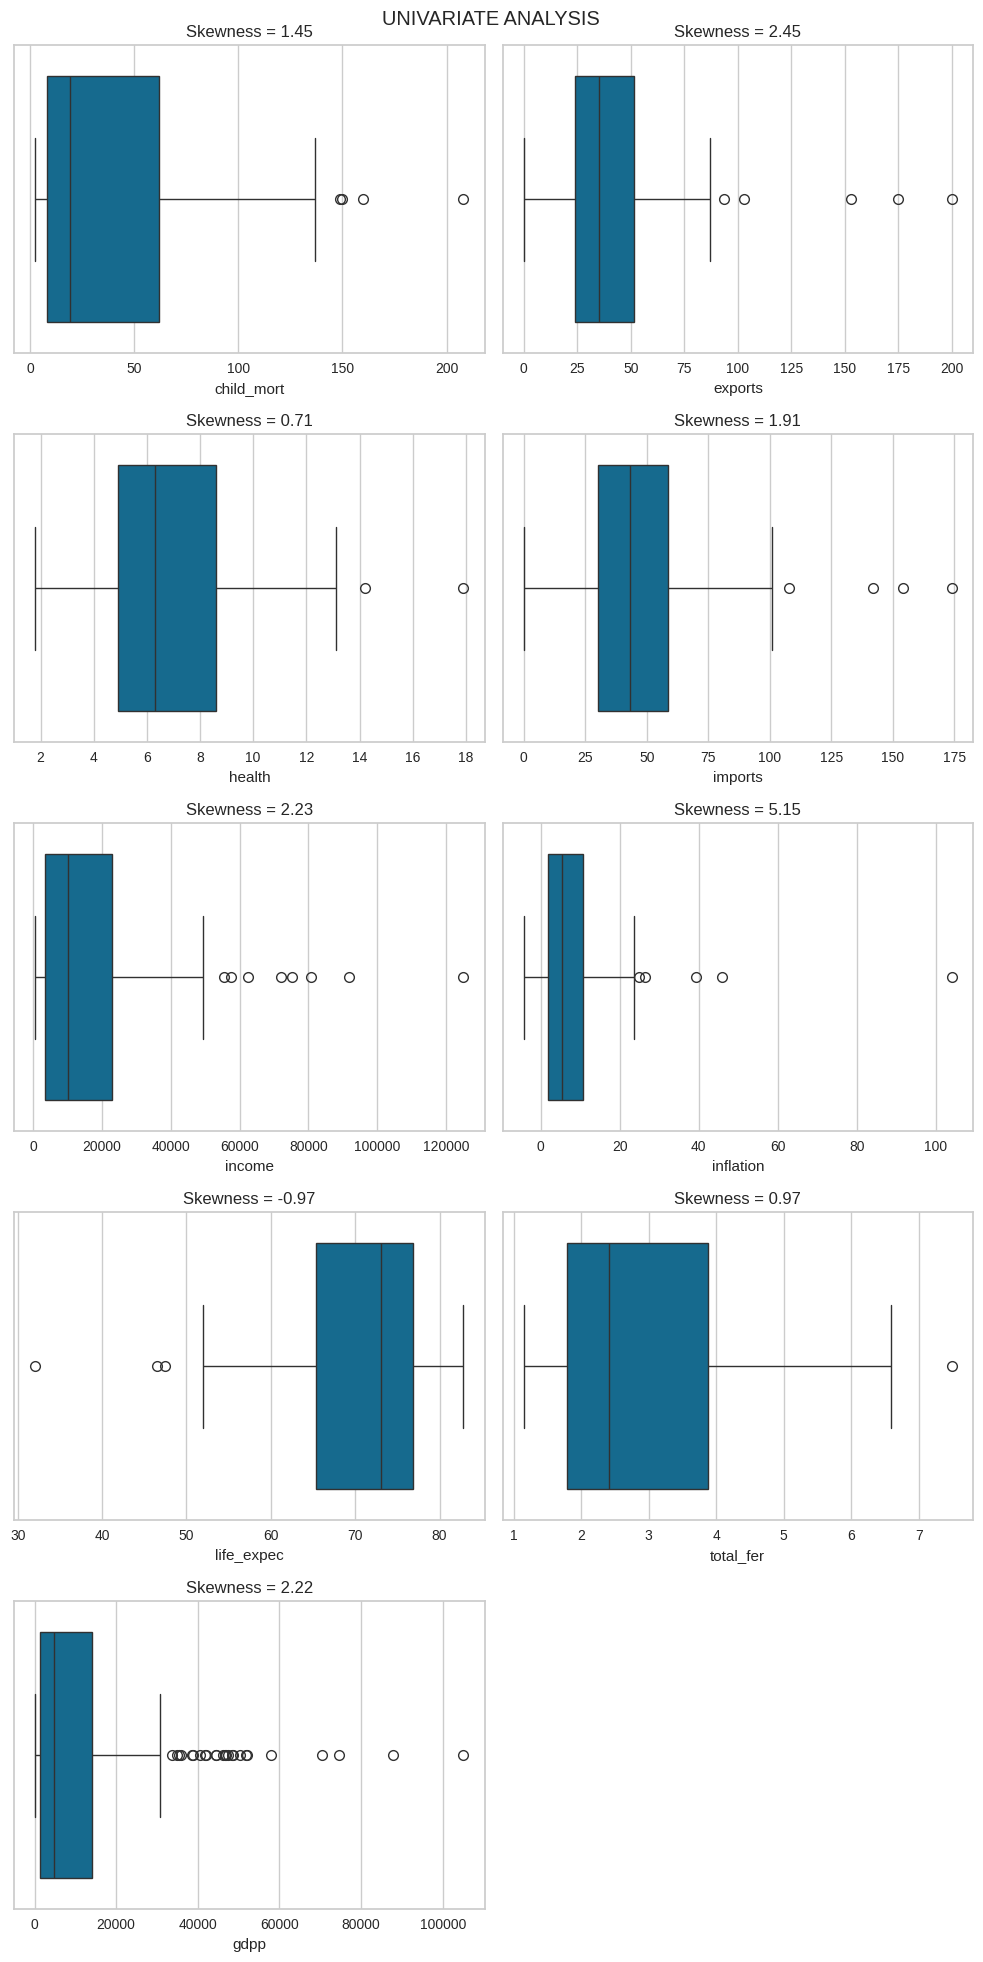

In [72]:
t = 1
plt.figure(figsize=(10,20))
plt.suptitle('UNIVARIATE ANALYSIS')
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data, x=i, fill=True)
    plt.title(f'Skewness = {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [73]:
## Multivariate Analysis

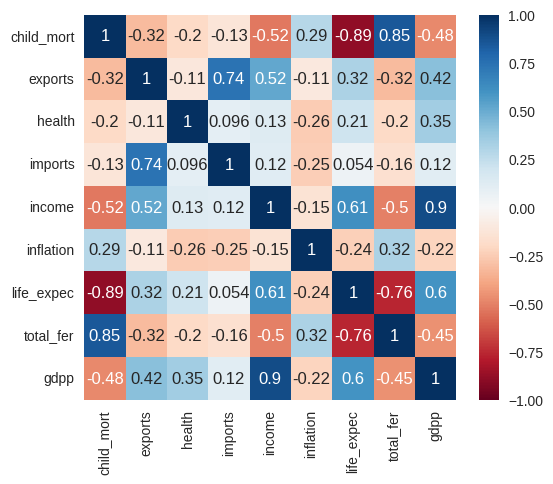

In [74]:
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(),vmin = -1, annot = True, cmap = 'RdBu')
plt.savefig('images/correlation_heatmap.png', bbox_inches='tight')
plt.show()

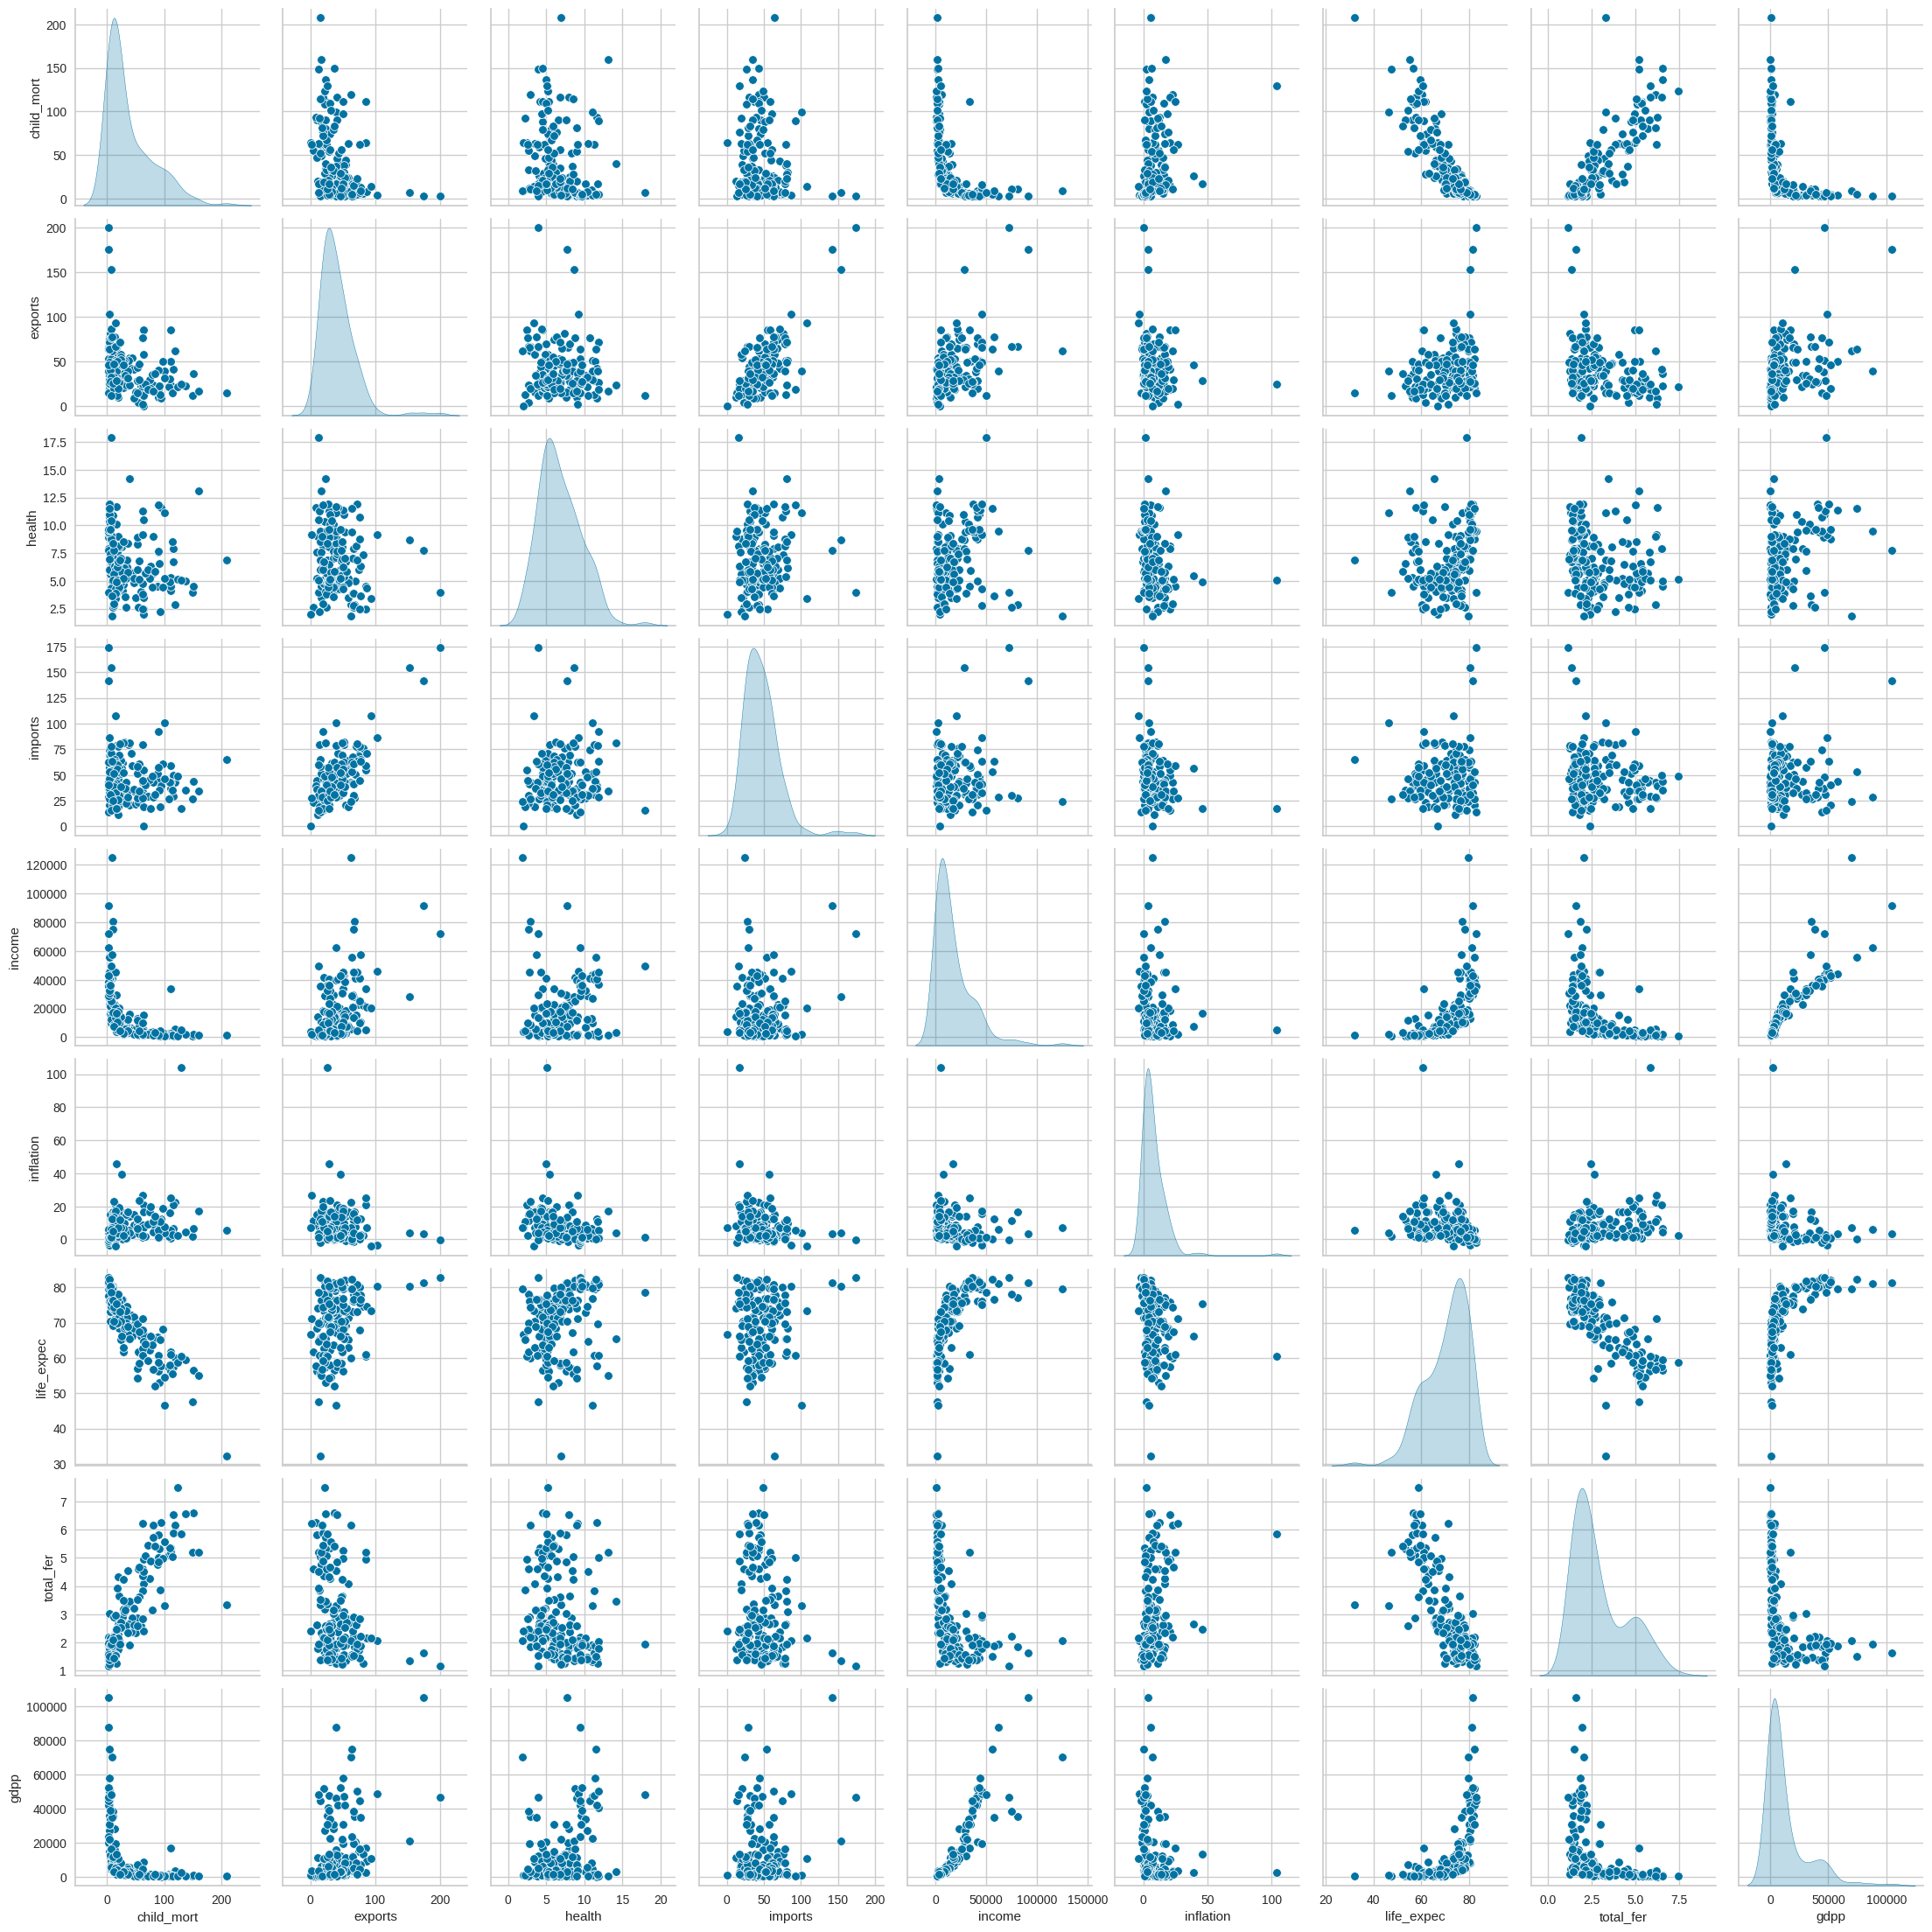

In [75]:
## PairPlot
sns.pairplot(data, diag_kind = 'kde')
plt.savefig('images/pair_plot.png', bbox_inches='tight')
plt.show()

##### Data Preprocessing

In [76]:
# MIssing Values
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

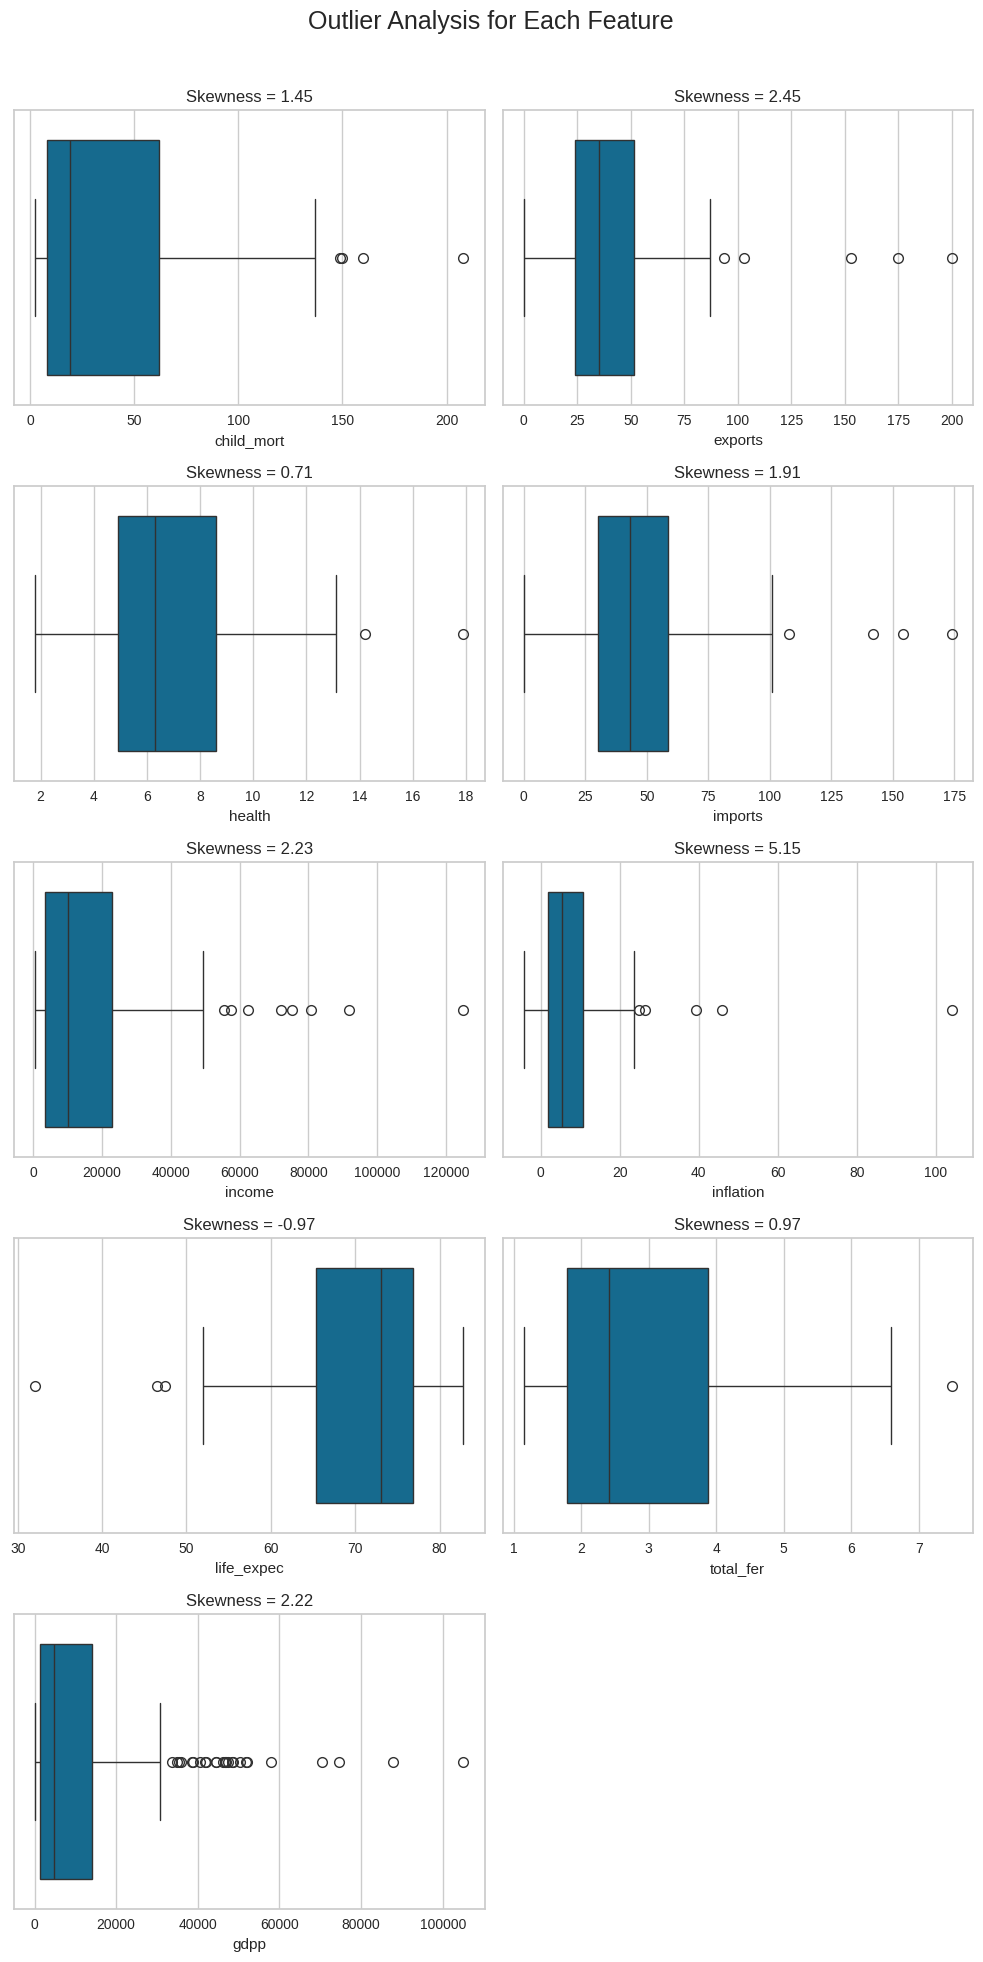

In [77]:
# Check for outliers
t = 1
plt.figure(figsize=(10, 20))
plt.suptitle('Outlier Analysis for Each Feature', fontsize=18)

# Loop through each column to create a boxplot
for i in data.columns:
    if data[i].dtype in ['int64', 'float64']: # Only plot for numeric columns
        plt.subplot(5, 2, t)
        sns.boxplot(data=data, x=i) # 'fill' is not a standard sns.boxplot argument
        plt.title(f'Skewness = {round(data[i].skew(), 2)}')
        t += 1

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to make space for suptitle

# Save the entire figure with all subplots after the loop is finished
plt.savefig('images/outlier_analysis_subplots.png', bbox_inches='tight')

plt.show()

In [78]:
# Lets go with cappling to treat the outliers (Cap the extreme Outliers)
for i in data.columns:
    q1,q3 = np.quantile(data[i],[0.25,0.75])
    iqr = q3-q1
    ul,ll = q3+2.5*iqr, q1-2.5*iqr
    data[i] = data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

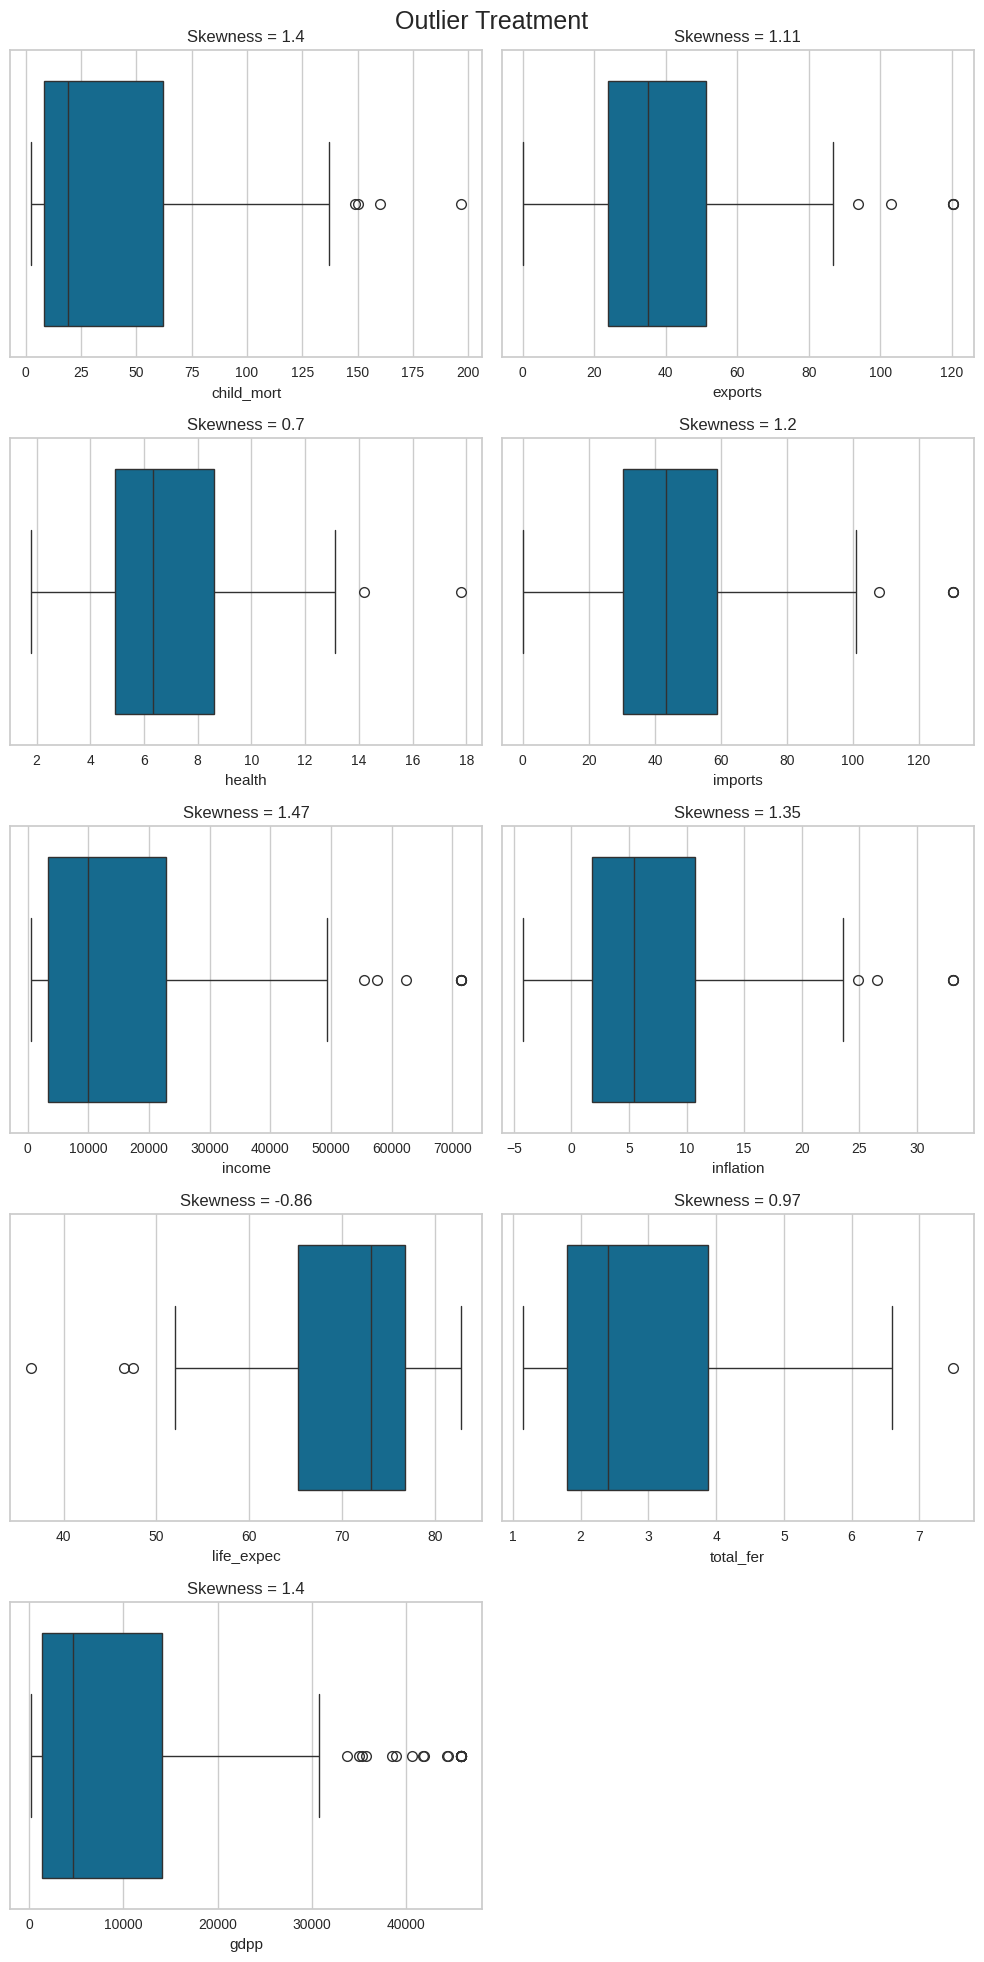

In [79]:
#Box after Outlier Treatment
t = 1
plt.figure(figsize=(10,20))
plt.suptitle('Outlier Treatment', fontsize =18)
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data, x=i)
    plt.title(f'Skewness = {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.savefig('images/after_outlier_treatment_subplots.png', bbox_inches='tight')
plt.show()

In [80]:
# Scale the data

In [81]:
scaler = StandardScaler()

In [82]:
data_s= data.copy()

In [83]:
data_s = pd.DataFrame(scaler.fit_transform(data_s),columns =data.columns,index = data.index)

In [84]:
data_s.head()

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.302168 -1.314143  0.279553 -0.068565 -0.878427   
Albania               -0.540991 -0.528460 -0.096883  0.099062 -0.391534   
Algeria               -0.273031 -0.074510 -0.966706 -0.680176 -0.217727   
Angola                 2.023403  0.968702 -1.449130 -0.159174 -0.627373   
Antigua and Barbuda   -0.698761  0.235398 -0.286928  0.565699  0.145102   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.303790   -1.642400   1.902882 -0.767399  
Albania              -0.381016    0.652932  -0.859973 -0.526335  
Algeria               1.225166    0.675771  -0.038404 -0.501118  
Angola                2.096738   -1.197037   2.128151 -0.564502  
Antigua and Barbuda  -0.802968    0.710030  -0.541946  0.026399

#### Clustering

* Step1 : Identify the value of k

Method 1 : K-elbow Method

In [85]:
wcss = []
n_clus = range(2,11)
for i in n_clus:
    mod = KMeans(n_clusters=i)
    mod.fit(data_s)
    wcss.append(mod.inertia_)

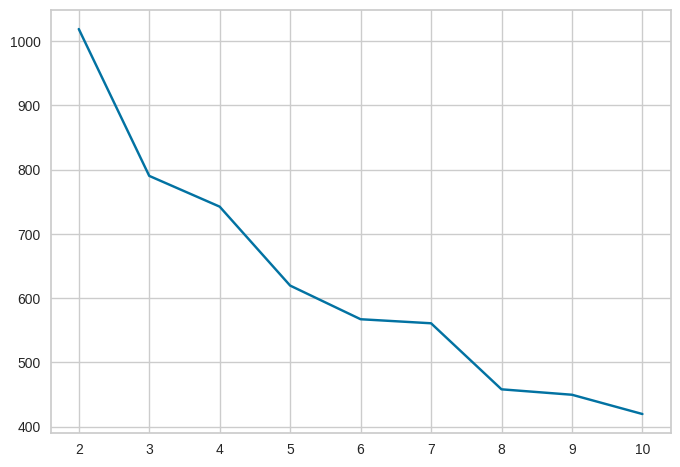

In [86]:
plt.plot(n_clus,wcss)
plt.show()

In [87]:
# Yellowbrick library to make kelbow plot
kelbow = KElbowVisualizer(estimator = KMeans(random_state=5), k = 10)

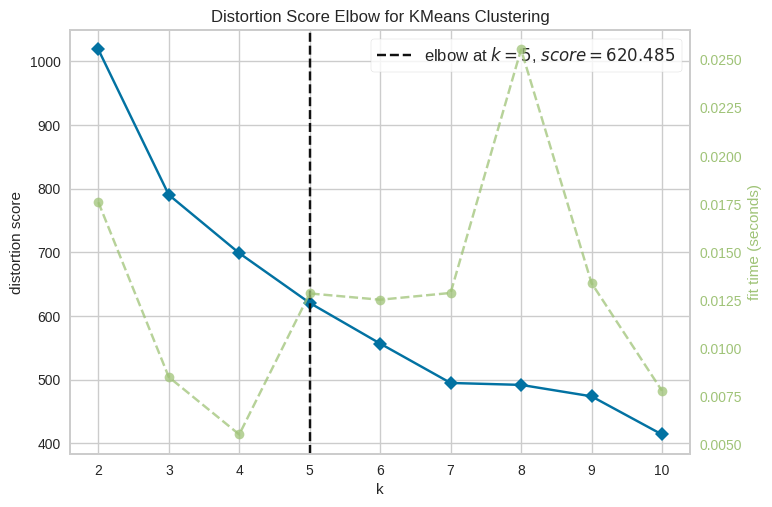

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
kelbow.fit(data_s)
plt.savefig('images/elbow_plot.png', bbox_inches='tight')
kelbow.show()


Method 2 : Silhoutte Visualizer

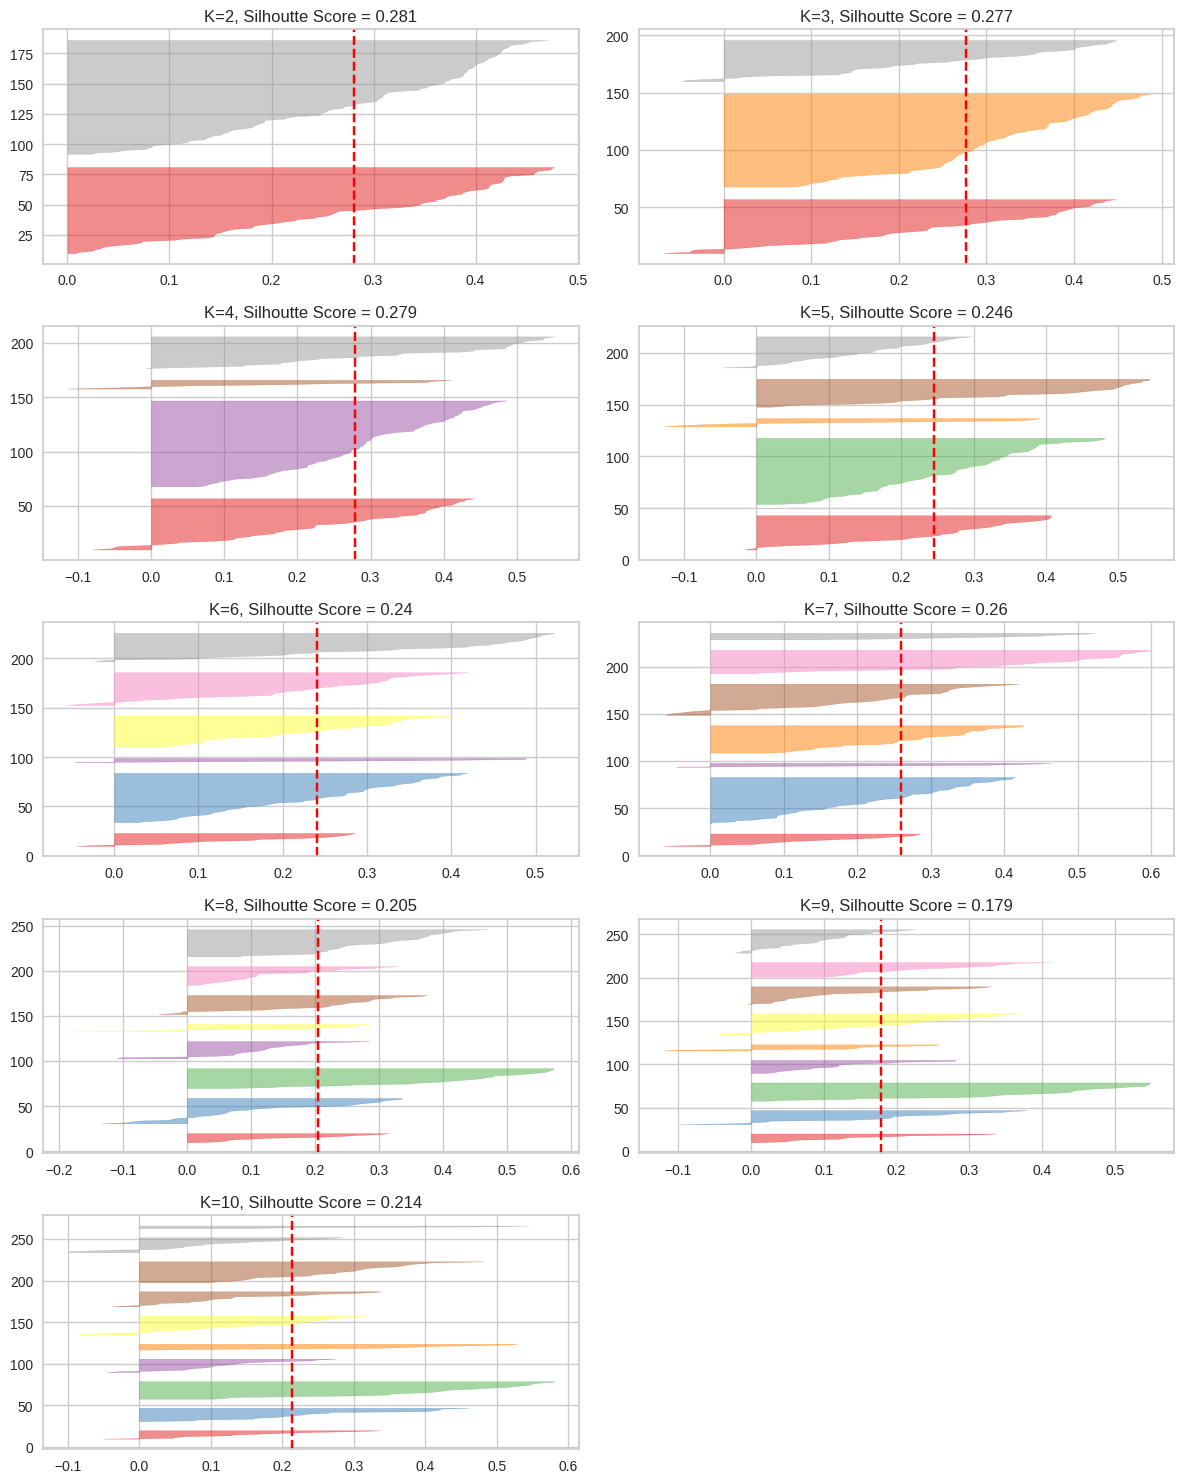

In [89]:
t=1
plt.figure(figsize=(12,15))
for i in n_clus:
    plt.subplot(5,2,t)
    model = KMeans(n_clusters=i, random_state = 5)
    sil_viz = SilhouetteVisualizer(estimator=model)
    sil_viz.fit(data_s)
    plt.title(f'K={i}, Silhoutte Score = {round(sil_viz.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.savefig('images/silhouette_plot.png', bbox_inches='tight')
plt.show()

In [90]:
# We will go with k=3

In [91]:
# Fit a final model with K = 3
final_kmeans = KMeans(n_clusters=3,random_state=5)

In [92]:
labels_kmean = final_kmeans.fit_predict(data_s)

In [93]:
labels_kmean

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

#### Visualize these clusters

In [94]:
data['Label'] = labels_kmean

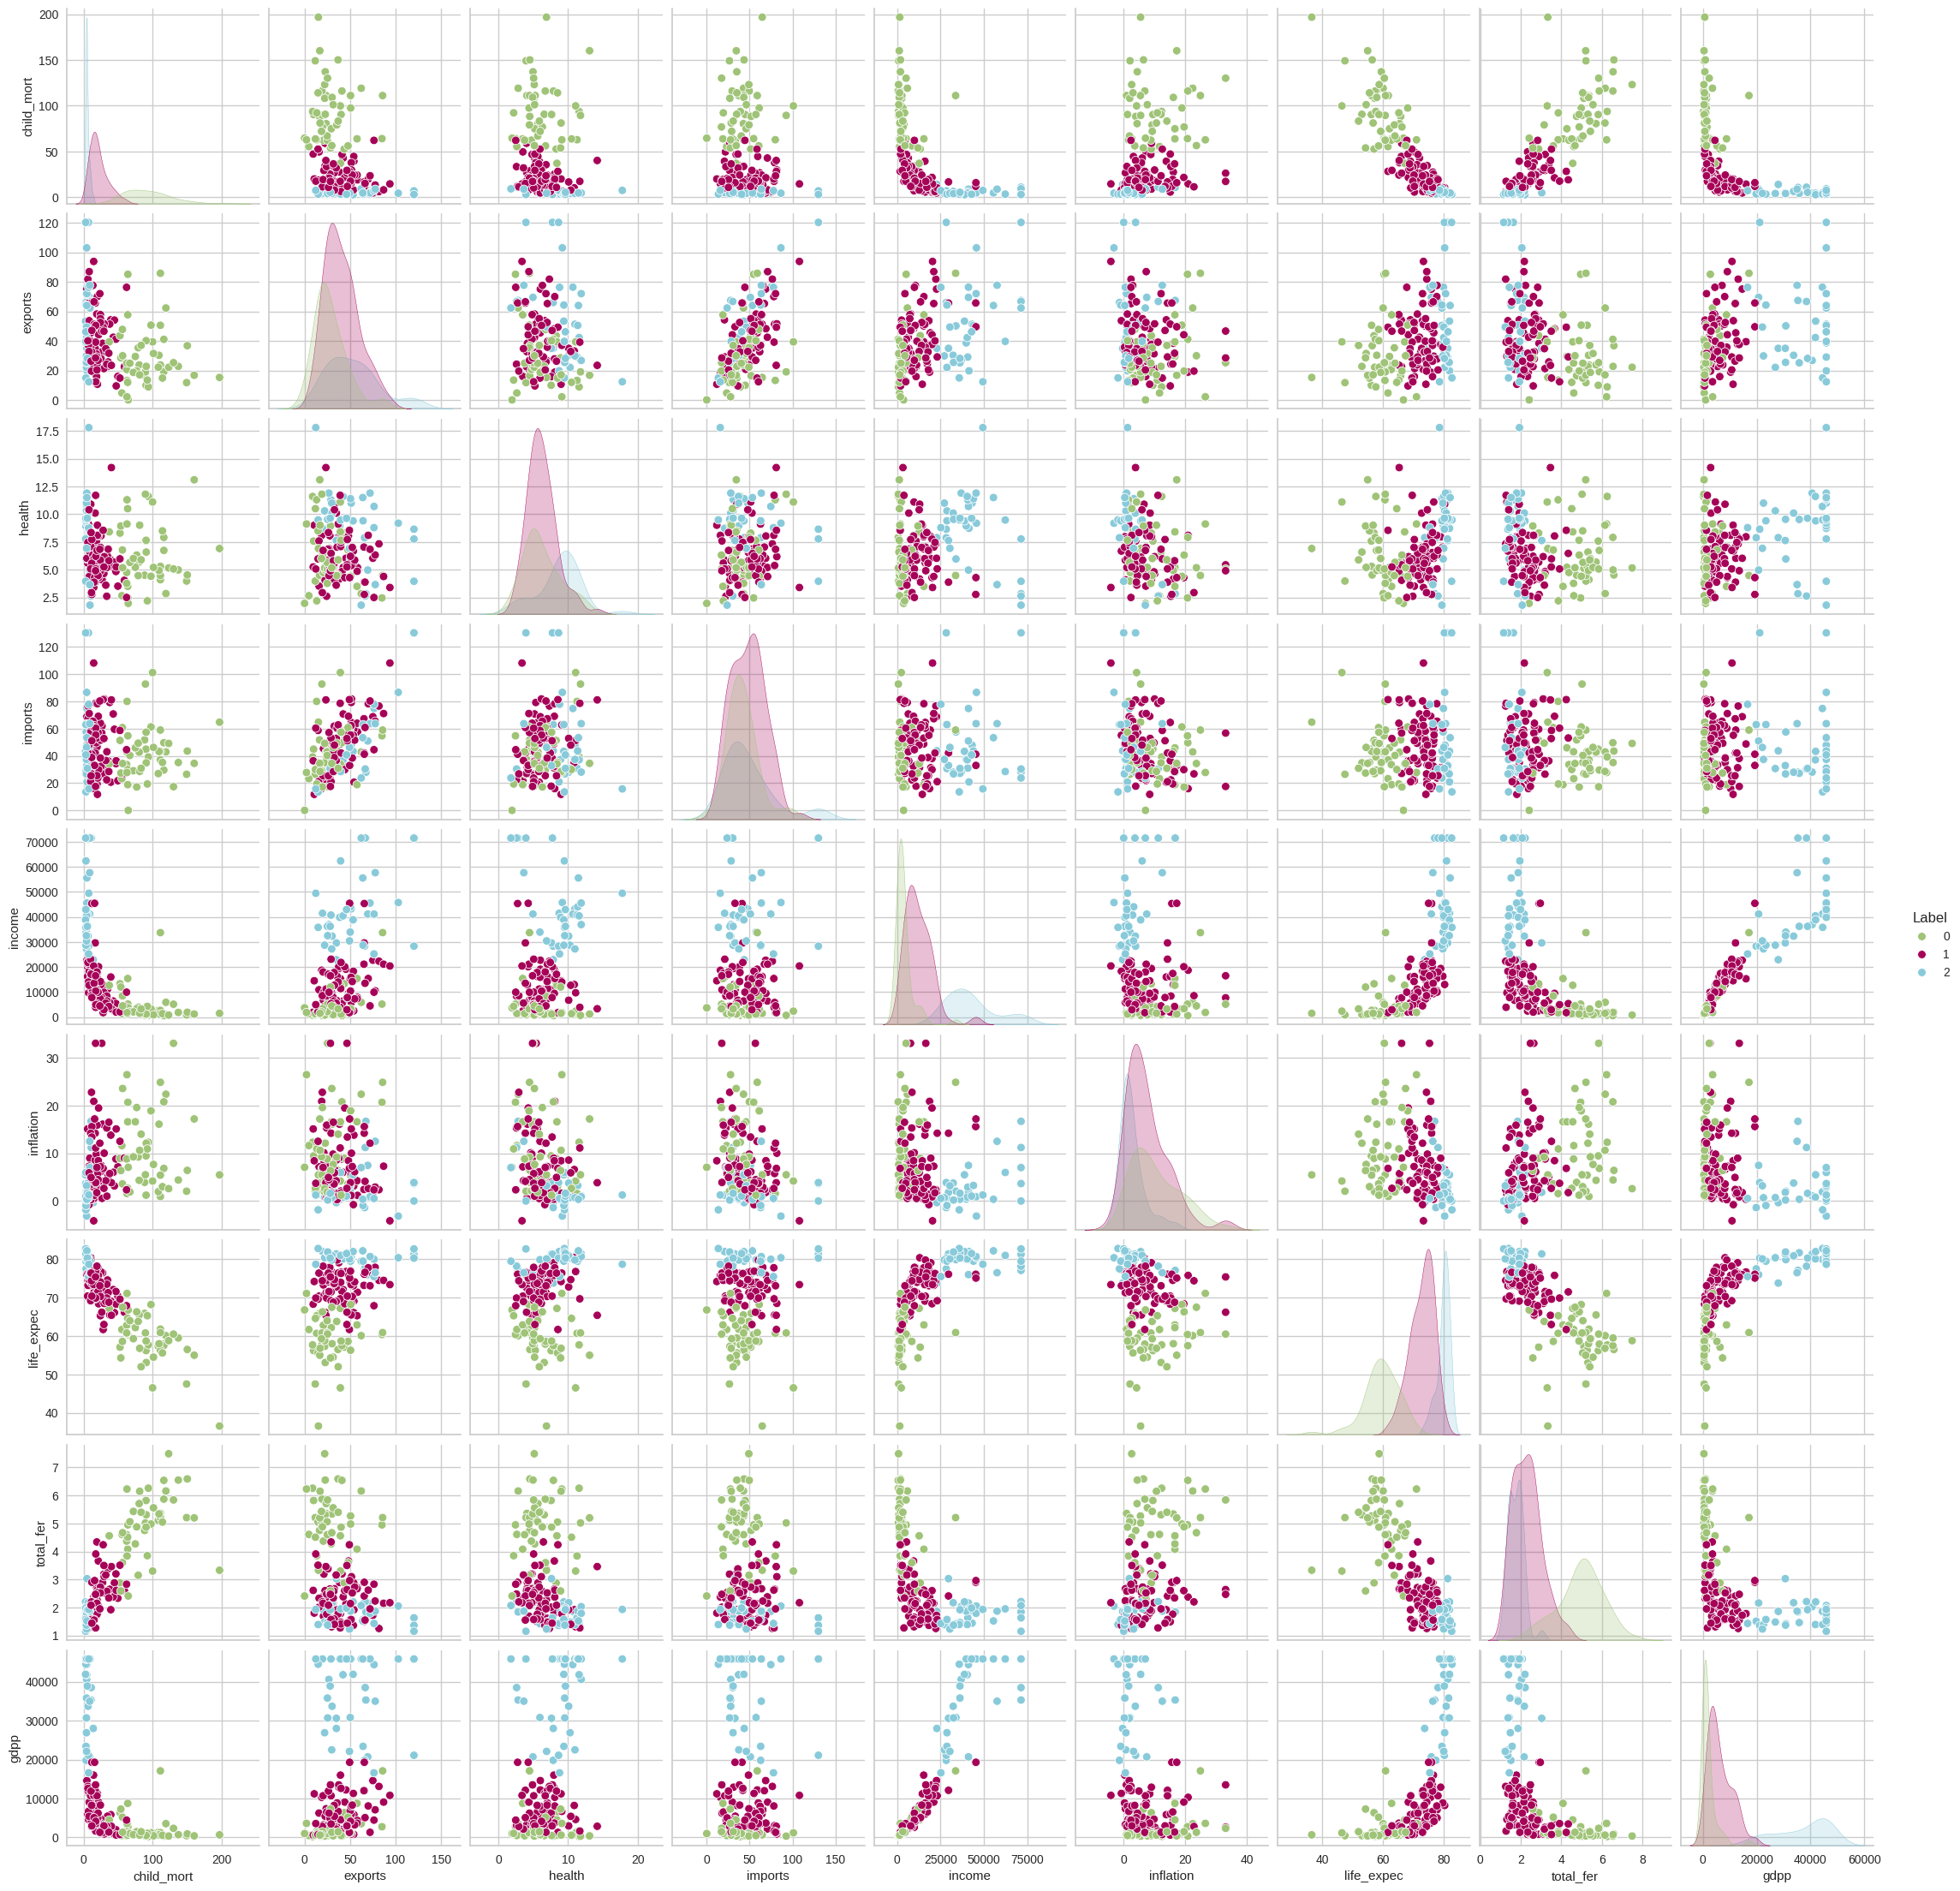

In [95]:
sns.pairplot(data,hue ='Label',diag_kind = 'kde',palette = ['g','m','c'])
plt.savefig('images/pairplot_after_clustering.png', bbox_inches='tight')
plt.show()

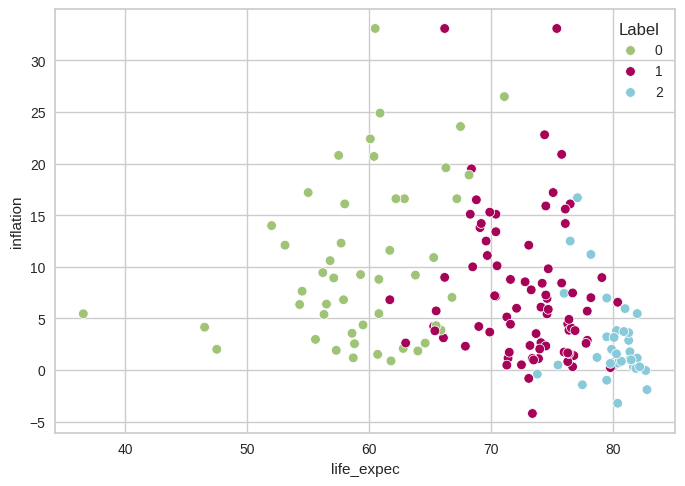

In [96]:
# Life Expectancy vs Inflation
sns.scatterplot(data = data, x='life_expec', y='inflation',hue = 'Label',palette = ['g','m','c'])
plt.show()

In [97]:
# Visualize the centroids
final_kmeans.cluster_centers_

array([[ 1.35054472, -0.50461786, -0.18954532, -0.22518072, -0.74220408,
         0.44197646, -1.27257242,  1.32908188, -0.67539546],
       [-0.41806654,  0.03013037, -0.21312087,  0.07629929, -0.25394598,
         0.0319073 ,  0.26188189, -0.42155521, -0.376317  ],
       [-0.82553217,  0.58786397,  0.71821855,  0.12303061,  1.52565853,
        -0.64408834,  1.07051786, -0.78995685,  1.71018854]])

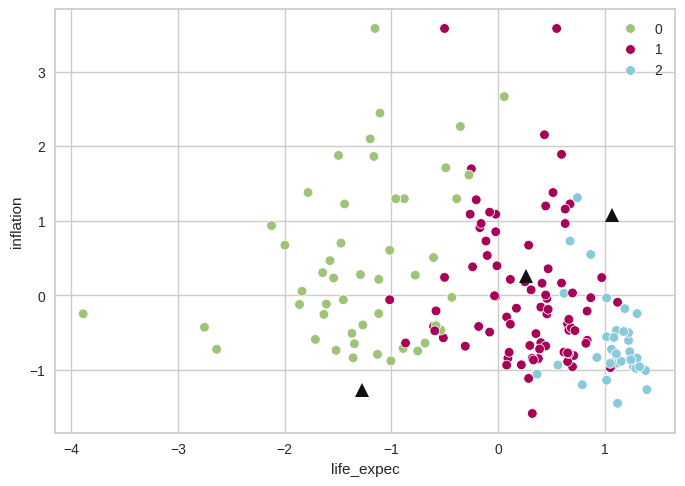

In [98]:
sns.scatterplot(data = data_s, x='life_expec', y='inflation',hue = labels_kmean,palette = ['g','m','c'])
centroids = final_kmeans.cluster_centers_
for i in range(3):
    plt.plot(centroids[i][6],centroids[i][6], marker = '^', color = 'k',ms = 10)
plt.savefig('images/life_expec_vs_inflation_clusters.png', bbox_inches='tight')
plt.show()

#### Aggloromative Clustering

In [99]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [100]:
# Step 1 : Create a distance matrix
data_s.shape

(167, 9)

In [101]:
dist_mat = euclidean_distances(data_s)
dist_mat.shape

(167, 167)

In [102]:
dist_mat

array([[0.        , 4.22497166, 4.05512607, ..., 4.81943201, 2.93131062,
        1.70971699],
       [4.22497166, 0.        , 2.21987426, ..., 2.68256614, 3.71500907,
        4.40647111],
       [4.05512607, 2.21987426, 0.        , ..., 3.0222937 , 2.15156181,
        3.65903186],
       ...,
       [4.81943201, 2.68256614, 3.0222937 , ..., 0.        , 3.86071845,
        4.55968616],
       [2.93131062, 3.71500907, 2.15156181, ..., 3.86071845, 0.        ,
        2.4025262 ],
       [1.70971699, 4.40647111, 3.65903186, ..., 4.55968616, 2.4025262 ,
        0.        ]])

In [103]:
# Step 2: Using distance matrix, lets create linkage matrix
link_matrix = linkage(dist_mat, method = 'ward')

In [104]:
link_matrix

array([[ 41.        , 121.        ,   1.44272406,   2.        ],
       [  8.        ,  44.        ,   1.79789272,   2.        ],
       [ 75.        , 158.        ,   1.89770657,   2.        ],
       [ 34.        , 119.        ,   2.27401464,   2.        ],
       [  4.        ,  24.        ,   2.47323943,   2.        ],
       [ 17.        ,  28.        ,   2.49857212,   2.        ],
       [ 48.        ,  61.        ,   2.49969821,   2.        ],
       [ 53.        , 144.        ,   2.5835313 ,   2.        ],
       [ 29.        ,  54.        ,   2.58883697,   2.        ],
       [ 50.        , 116.        ,   2.69116158,   2.        ],
       [ 80.        , 129.        ,   2.7425147 ,   2.        ],
       [ 71.        , 125.        ,   2.75089707,   2.        ],
       [ 23.        ,  82.        ,   2.75499399,   2.        ],
       [ 60.        , 122.        ,   2.80044691,   2.        ],
       [ 13.        , 167.        ,   2.83607045,   3.        ],
       [100.        , 171

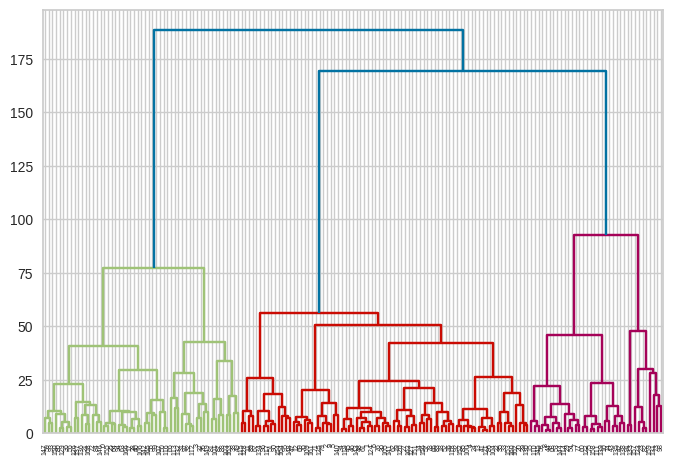

In [105]:
# To create a Dendrogram
dendrogram(link_matrix)
plt.show()

In [106]:
# Let's calculate Cophenetic Correlation coefficient
actual_dist = dist_mat[np.triu_indices(167, k=1)]
actual_dist

array([4.22497166, 4.05512607, 3.50657505, ..., 3.86071845, 4.55968616,
       2.4025262 ])

In [107]:
cophenet(link_matrix,actual_dist)

(np.float64(0.5938368934086127),
 array([188.49913764, 188.49913764,  77.22355444, ..., 188.49913764,
        188.49913764,  29.81494541]))

Hence we can go with wards linkage with k = 3

In [108]:
final_agglo = AgglomerativeClustering(n_clusters = 3)

In [109]:
labels_agglo = final_agglo.fit_predict(data_s)

In [110]:
silhouette_score(data_s, labels_agglo)

np.float64(0.26372599816303177)

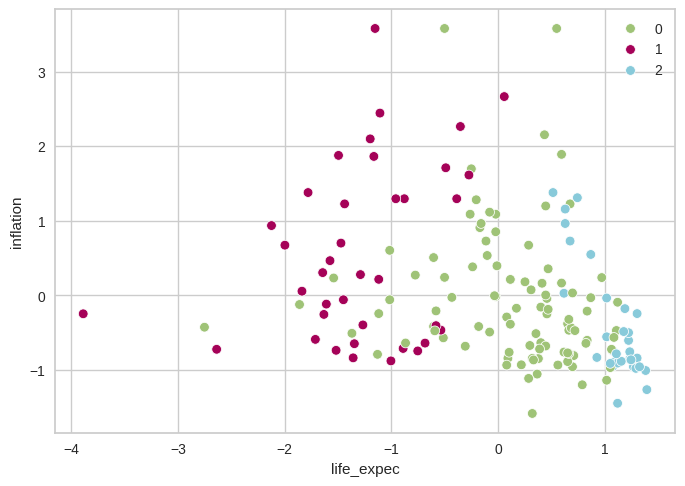

In [111]:
sns.scatterplot(data = data_s, x='life_expec', y='inflation',hue = labels_agglo ,palette = ['g','m','c'])
plt.show()

##### Business Interpretation

In [112]:
data.head()

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   

                     life_expec  total_fer     gdpp  Label  
country                                                     
Afghanistan                56.2       5.82    553.0      0  
Albania                    76.3       1.65   4090.0      1  
Algeria                    76.5       2.89   4460.0      1  
Angola                     60.1       6.16   3530.0      0  
Antigua and Barbuda        76.8       2.13  12200.0      1

In [113]:
data.groupby(by = 'Label').mean().T

Label                 0             1             2
child_mort    92.131771     21.508537      5.237838
exports       28.546229     40.797317     53.575000
health         6.296458      6.231951      8.780270
imports       41.443040     48.097561     49.129054
income      3937.770833  12281.097561  42690.878378
inflation     10.438854      7.474744      2.588432
life_expec    59.438542     72.875610     79.956757
total_fer      4.953958      2.311707      1.755676
gdpp        1902.916667   6291.146341  36905.405405

In [114]:
lab_map = {2:'Developed', 1:'Developing', 0:'Underdeveloped'}

In [115]:
data['Label'] = data['Label'].map(lab_map)

In [116]:
data.head()

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   

                     life_expec  total_fer     gdpp           Label  
country                                                              
Afghanistan                56.2       5.82    553.0  Underdeveloped  
Albania                    76.3       1.65   4090.0      Developing  
Algeria                    76.5       2.89   4460.0      Developing  
Angola                     60.1       6.16   3530.0  Underdeveloped  
Antigua and Barbuda        76.8       2.13  12200.0      Developing

In [117]:
# Underdevloped
data[data['Label']== 'Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

In [118]:
# Developed
data[data['Label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [119]:
# Developing
data[data['Label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

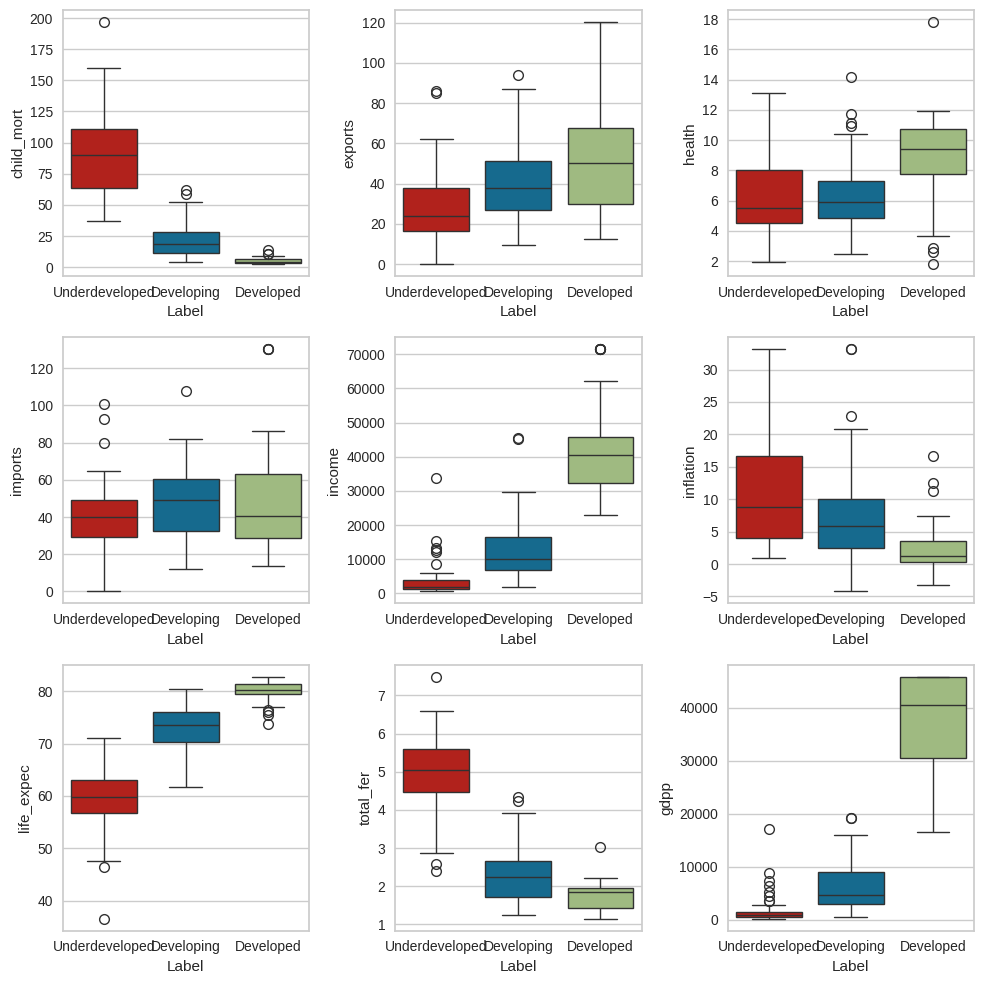

In [120]:
# Visualize the parameters in each clusters
t=1
plt.figure(figsize=(10,10))
for i in data:
    if i !='Label':
        plt.subplot(3,3,t)
        sns.boxplot(data=data,y=i,x='Label',palette=['r','b','g'])
        t+=1
plt.tight_layout()
plt.savefig('images/boxplot_features_clusters.png', bbox_inches='tight')
plt.show()


In [121]:
# we can also create a world map
import plotly.express as px


In [123]:

f=px.choropleth(data_frame = data,locationmode='country names',color = 'Label', locations = data.index,
              color_discrete_map={'Developed':'green', 'Developing':'blue','Underdeveloped':'Red'})
f.show()